# Example Notebook explaining the base station Class 

This notebook will explain the attributes and methods of the base station class which all of the specialised weather station classes inherit from. 

In particular it gives detail on how to create a station class given a `station_id`, how to retrieve all of the latest measurements from the station, plotting data, accessing station metadata such as latitude, longitude and flood status 

To begin we must import `station` from our `flood_monitoring` package 

 Installing through github. 

In [3]:
!pip install git+https://github.com/niv-en/flood-monitoring

  Cloning https://github.com/niv-en/flood-monitoring to /private/var/folders/2b/758fcv4x1db1n7sbf0zmpkpw0000gn/T/pip-req-build-si6323nu
  Running command git clone --filter=blob:none --quiet https://github.com/niv-en/flood-monitoring /private/var/folders/2b/758fcv4x1db1n7sbf0zmpkpw0000gn/T/pip-req-build-si6323nu
  Resolved https://github.com/niv-en/flood-monitoring to commit 76f70934910756d12ddd3c4fc0801d7a7fc5914f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for flood-monitoring: filename=flood_monitoring-0.1.0-py3-none-any.whl size=7641 sha256=074b62c247be9b0776f3741e58d177d8c4b381acec6c15356a843f71dee8d0c4
  Stored in directory: /private/var/folders/2b/758fcv4x1db1n7sbf0zmpkpw0000gn/T/pip-ephem-wheel-cache-rktya66x/wheels/c7/d9/3c/cc0028dcd57b25b469d973c2ac4b609301b70a1c478030c814
Successfully built flood-monitoring

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[

In [3]:
### `plot_data` 

In [16]:
from flood_monitoring import station

Initialiising a station type with a valid `station_id` 

In [17]:
test_station = station('F1906') 

## Accessing `station` attributes 

We can print all of the stations attributes using the `var` function 

In [19]:
vars(test_station)

{'station_id': 'F1906',
 'parameter': '',
 'qualifier': None,
 'measure_type': '',
 '_station__lat': 54.080705,
 '_station__long': -2.024779,
 '_station__in_flood': False,
 'measures': [{'qualifier': 'Stage',
   'units': 'm',
   'value_type': 'instantaneous',
   'notation': 'F1906-level-stage-i-15_min-m'},
  {'qualifier': 'Logged',
   'units': 'm3/s',
   'value_type': 'instantaneous',
   'notation': 'F1906-flow-logged-i-15_min-m3_s'}],
 'data': [0.233, None],
 'timestamps': ['2025-05-21T18:00:00Z', None]}

###  `station_id` 

 Unique reference which is used to identify each station

###  `parameter`

 Used in conjustion with `qualifier` to define which type of measure station we want, given that `station` is the base class we can see that both are blank 

###  `_station__lat`  , `_station__long` 

display the longitude and latiduate and can be accessed by calling either `station.latitude`, `station.longitude` but have no setter method hence cannot be altered 

In [6]:
test_station.latitude, test_station.longitude 

(54.080705, -2.024779)

Attempting to set both the latitude and longitude 

In [7]:
#attempting to manually set the latitude 
try:
    test_station.latitude = 2
except AttributeError:
    print('cant set the latitude') 

#attemtping to manually set the longitude 

try:
    test_station.longitude = 123

except AttributeError:
    print('cant set the longitude')


cant set the latitude
cant set the longitude


### `_station_in_flood` 

in a similar vain to both latitude and longitude, the stations in flood status can be accesed through `station.in_flood` but cannot be modified manually 

In [8]:
test_station.in_flood

False

In [9]:
try:
    test_station.in_flood = False 


except AttributeError:

    print('cant set the in_flood status')

cant set the in_flood status


### `measures` 

meausres stores a list of dictionaries each of which describe a particular measure 

### `data` 

data stores the value of the most recent measurement, for each of the stations measurements 

### `timestamps` 

`timestamps` stores the timestamp of the most recent measurement which is stored in `data` , the order of these values are alligned with both `data` and `measures` 

Given that `measures`, `data` and `timestamps` are all aligned it is easy to zip them together like so 

In [10]:
for measure, time, value in zip(test_station.measures, test_station.timestamps, test_station.data):

    print(f'measure : {measure}, time : {time}, value : {value }')

measure : {'qualifier': 'Stage', 'units': 'm', 'value_type': 'instantaneous', 'notation': 'F1906-level-stage-i-15_min-m'}, time : 2025-05-21T18:00:00Z, value : 0.233
measure : {'qualifier': 'Logged', 'units': 'm3/s', 'value_type': 'instantaneous', 'notation': 'F1906-flow-logged-i-15_min-m3_s'}, time : None, value : None


## Using `stations` methods

Despite stations methods being particularly designed to be called by the each of the measure station classes: `RiverLevel`, `RiverFlow`, `TidalLevel` and `Temperature`. They can still be called by the base station class with the exception that it will plot all measures available to a particular station rather than those for a particular measure such as river level etc. 

###  `get_latest_measurement()` 

Get latest measurement will retrieve all the latest measurement for all measures stored inside of `station.measures` 

In [11]:
test_station = station('F1906')

In [12]:
test_station.get_latest_measurement() 

{'F1906-level-stage-i-15_min-m': 0.233,
 'F1906-flow-logged-i-15_min-m3_s': None}

Here we can see it prints the measures notation as well its most recent value, and that the latest reading is not available for the flow measurement 

### `plot_data` 

`plot_data`  draws from the `measures`, `timestamps`, `values` attributes of our `station` object. So it essentially plots all of the measures with non null values for each of the stations measures at the time of its initialisation, this can be seen as above `get_latest_measures` returns a dictionary with 2 meausres but given that one of them had a reading of `None` we exclude it from plotting 

In [13]:
import matplotlib.pyplot as plt 

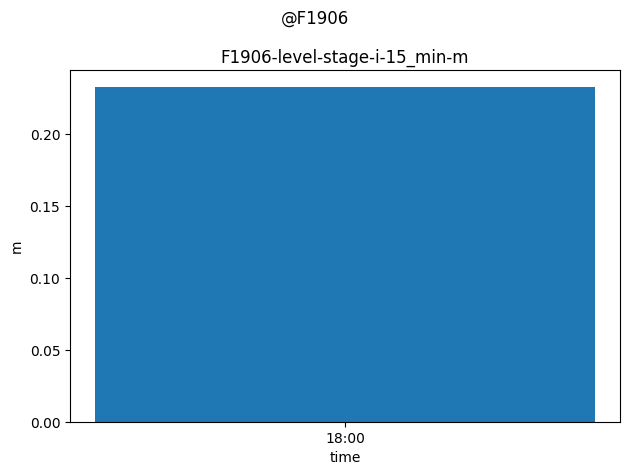

In [14]:
fig, ax = test_station.plot_data() 

plt.show() 

### `plot_data_range()`

`plot_data_range()` unlike `plot_data()` actually requests information from the api. It retrieves all readings for all of the measures defined in  `station.measures` over the date range specified. Similar to `plot_data()` we only plot measuers with readings available and if no readings are available then an error will be raised. 

/var/folders/2b/758fcv4x1db1n7sbf0zmpkpw0000gn/T/ipykernel_72162/2535843310.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


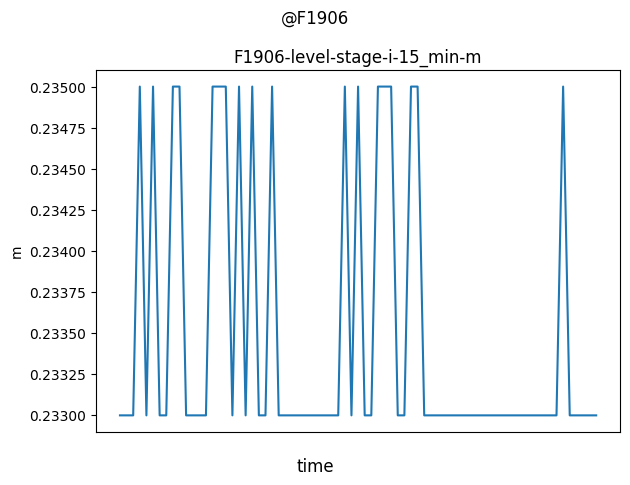

In [15]:
fig, ax = test_station.plot_data_range() 
fig.tight_layout() 
fig.show(); 